In [2]:
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import time
import json
from time import sleep
from typing import List, Optional, Tuple

In [13]:
import pandas as pd

file1 = 'bankofbaroda.csv'
file2 = 'canara.csv'
file3 = 'pnb.csv'
file4 = 'union.csv'
file5 = 'sbibank.csv'

df_canara = pd.read_csv(file2)
df_union = pd.read_csv(file4)
df_bankofbaroda = pd.read_csv(file1)
df_pnb = pd.read_csv(file3)
df_sbibank = pd.read_csv(file5)


df_canara.head(), df_union.head(), df_sbibank.head() ,df_pnb.head(), df_bankofbaroda.head()



(                               reviewId         userName  \
 0  5731adbd-62cd-4da3-898c-aa93091592c3     Ashish Kumar   
 1  0f23b2b8-3b33-4837-9215-67394ec74e7b  Nanjundaswamy P   
 2  c7443a3f-87c4-4761-8b60-5685e66cb719              A K   
 3  558bafc6-0474-4c0e-bc6b-409c535fc51d   Andiappan Ravi   
 4  37be60d3-35b8-420c-8cdd-6fd423abeb50      rahul singh   
 
                                              content  score  thumbsUpCount  \
 0                                                  👍      5              0   
 1  Opp not working pls clear problems pls immedia...      5              0   
 2                                             ,🙊🙉🙈🤯😭      1              0   
 3  I pray for long years this good thing will be ...      4              0   
 4                              ok...nice application      5              0   
 
   reviewCreatedVersion                   at appVersion  
 0               3.5.35  2024-08-11 09:22:18     3.5.35  
 1               3.5.35  2024-08-11 09:1

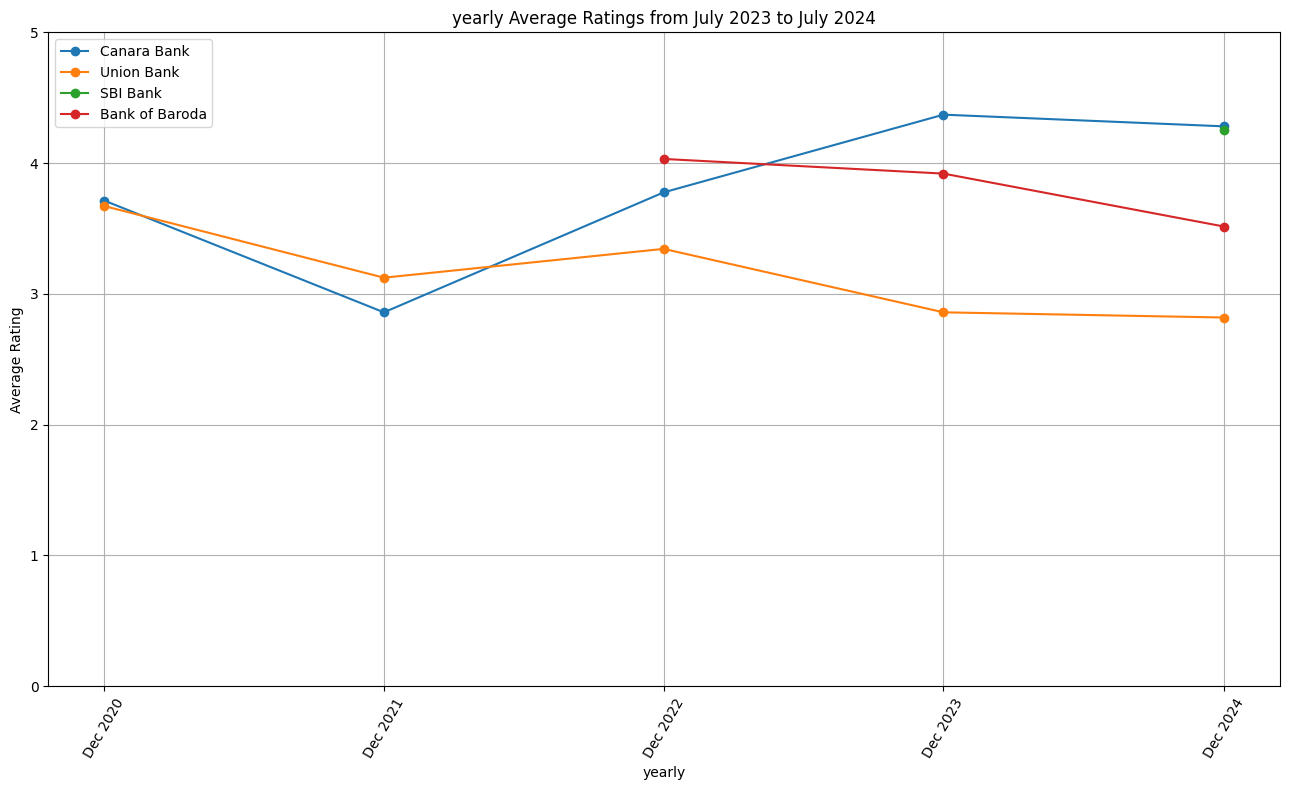

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'at' column to datetime format
df_canara['at'] = pd.to_datetime(df_canara['at'])
df_union['at'] = pd.to_datetime(df_union['at'])
df_sbibank['at'] = pd.to_datetime(df_sbibank['at'])
# df_pnb['at'] = pd.to_datetime(df_pnb['at'])
df_bankofbaroda['at'] = pd.to_datetime(df_bankofbaroda['at'])

#  the average rating
canara_yearly = df_canara.resample('Y', on='at').score.mean()
union_yearly = df_union.resample('Y', on='at').score.mean()
sbibank_yearly= df_sbibank.resample('Y', on='at').score.mean()
# pnb_monthly = df_pnb.resample('M', on='at').score.mean()
bankofbaroda_yearly = df_bankofbaroda.resample('Y', on='at').score.mean()


full_date_range = pd.date_range(start='2020', end='2025', freq='Y')


canara_yearly = canara_yearly.reindex(full_date_range)
union_yearly = union_yearly.reindex(full_date_range)
sbibank_monthly = sbibank_yearly.reindex(full_date_range)
# pnb_monthly = pnb_monthly.reindex(full_date_range)
bankofbaroda_yearly = bankofbaroda_yearly.reindex(full_date_range)


plt.figure(figsize=(13, 8))

plt.plot(canara_yearly.index, canara_yearly, marker='o', label='Canara Bank')
plt.plot(union_yearly.index, union_yearly, marker='o', label='Union Bank')
plt.plot(sbibank_yearly.index, sbibank_yearly, marker='o', label='SBI Bank')
# plt.plot(pnb_monthly.index, pnb_monthly, marker='o', label='PNB Bank')
plt.plot(bankofbaroda_yearly.index, bankofbaroda_yearly, marker='o', label='Bank of Baroda')

plt.title('yearly Average Ratings from July 2023 to July 2024')
plt.xlabel('yearly')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.xticks(canara_yearly.index, canara_yearly.index.strftime('%b %Y'), rotation=60)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

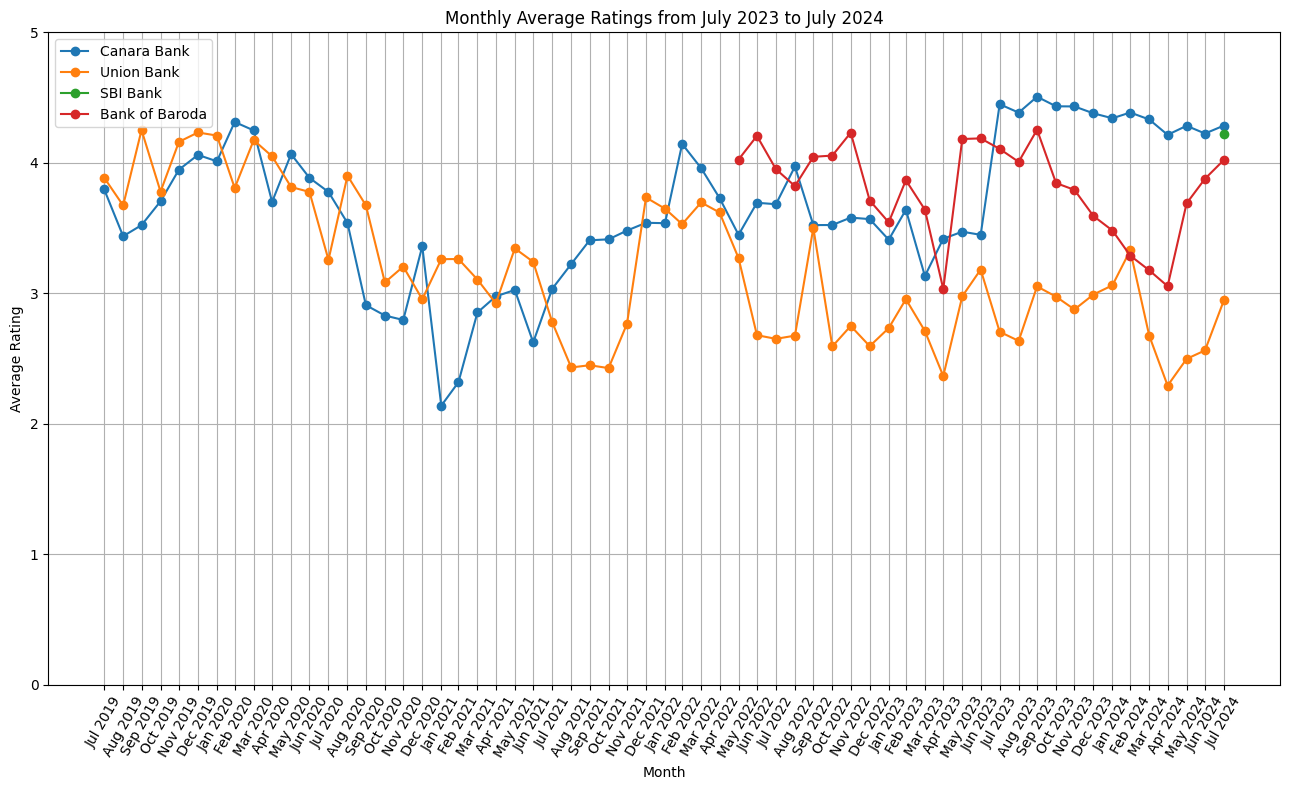

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'at' column to datetime format
df_canara['at'] = pd.to_datetime(df_canara['at'])
df_union['at'] = pd.to_datetime(df_union['at'])
df_sbibank['at'] = pd.to_datetime(df_sbibank['at'])
# df_pnb['at'] = pd.to_datetime(df_pnb['at'])
df_bankofbaroda['at'] = pd.to_datetime(df_bankofbaroda['at'])

#  the average rating
canara_monthly = df_canara.resample('M', on='at').score.mean()
union_monthly = df_union.resample('M', on='at').score.mean()
sbibank_monthly = df_sbibank.resample('M', on='at').score.mean()
# pnb_monthly = df_pnb.resample('M', on='at').score.mean()
bankofbaroda_monthly = df_bankofbaroda.resample('M', on='at').score.mean()


full_date_range = pd.date_range(start='2019-07-01', end='2024-07-31', freq='M')


canara_monthly = canara_monthly.reindex(full_date_range)
union_monthly = union_monthly.reindex(full_date_range)
sbibank_monthly = sbibank_monthly.reindex(full_date_range)
# pnb_monthly = pnb_monthly.reindex(full_date_range)
bankofbaroda_monthly = bankofbaroda_monthly.reindex(full_date_range)


plt.figure(figsize=(13, 8))

plt.plot(canara_monthly.index, canara_monthly, marker='o', label='Canara Bank')
plt.plot(union_monthly.index, union_monthly, marker='o', label='Union Bank')
plt.plot(sbibank_monthly.index, sbibank_monthly, marker='o', label='SBI Bank')
# plt.plot(pnb_monthly.index, pnb_monthly, marker='o', label='PNB Bank')
plt.plot(bankofbaroda_monthly.index, bankofbaroda_monthly, marker='o', label='Bank of Baroda')

plt.title('Monthly Average Ratings from July 2023 to July 2024')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.xticks(canara_monthly.index, canara_monthly.index.strftime('%b %Y'), rotation=60)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

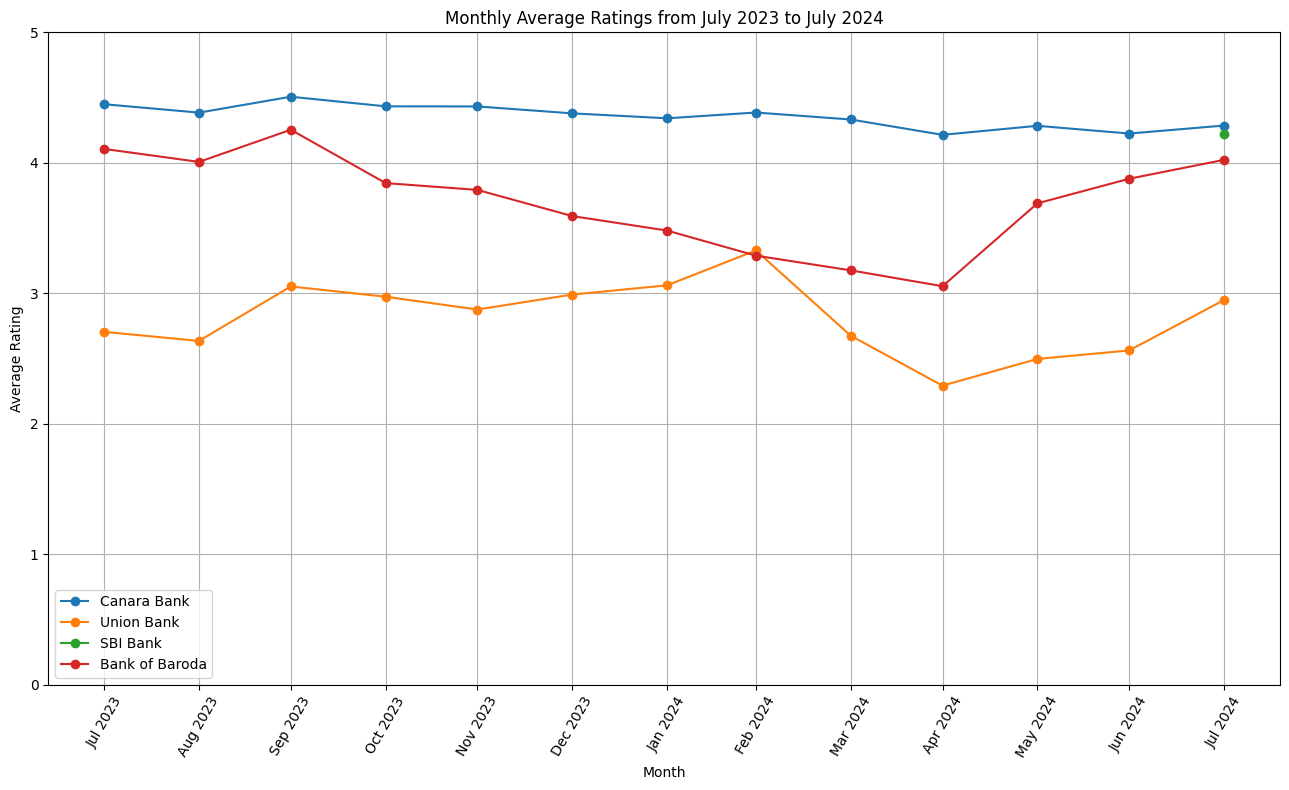

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'at' column to datetime format
df_canara['at'] = pd.to_datetime(df_canara['at'])
df_union['at'] = pd.to_datetime(df_union['at'])
df_sbibank['at'] = pd.to_datetime(df_sbibank['at'])
# df_pnb['at'] = pd.to_datetime(df_pnb['at'])
df_bankofbaroda['at'] = pd.to_datetime(df_bankofbaroda['at'])

#  the average rating
canara_monthly = df_canara.resample('M', on='at').score.mean()
union_monthly = df_union.resample('M', on='at').score.mean()
sbibank_monthly = df_sbibank.resample('M', on='at').score.mean()
# pnb_monthly = df_pnb.resample('M', on='at').score.mean()
bankofbaroda_monthly = df_bankofbaroda.resample('M', on='at').score.mean()


full_date_range = pd.date_range(start='2023-07-01', end='2024-07-31', freq='M')


canara_monthly = canara_monthly.reindex(full_date_range)
union_monthly = union_monthly.reindex(full_date_range)
sbibank_monthly = sbibank_monthly.reindex(full_date_range)
# pnb_monthly = pnb_monthly.reindex(full_date_range)
bankofbaroda_monthly = bankofbaroda_monthly.reindex(full_date_range)


plt.figure(figsize=(13, 8))

plt.plot(canara_monthly.index, canara_monthly, marker='o', label='Canara Bank')
plt.plot(union_monthly.index, union_monthly, marker='o', label='Union Bank')
plt.plot(sbibank_monthly.index, sbibank_monthly, marker='o', label='SBI Bank')
# plt.plot(pnb_monthly.index, pnb_monthly, marker='o', label='PNB Bank')
plt.plot(bankofbaroda_monthly.index, bankofbaroda_monthly, marker='o', label='Bank of Baroda')

plt.title('Monthly Average Ratings from July 2023 to July 2024')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.xticks(canara_monthly.index, canara_monthly.index.strftime('%b %Y'), rotation=60)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()